/Users/aimlessfox/anaconda3/envs/tf15/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Instructions for updating:
non-resource variables are not supported in the long term


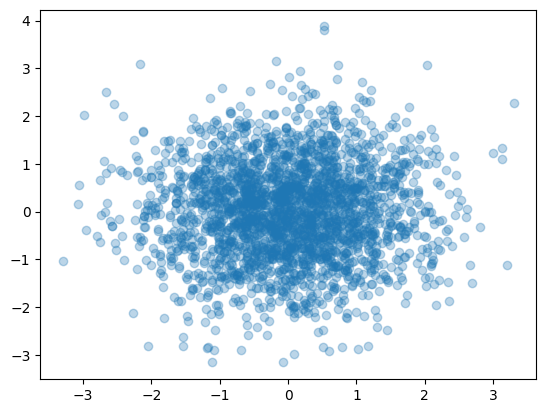

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

import tensorflow as tf
## tf version 2.13.0
tf.__version__
from mdn_model import MDN

# X, y = make_moons(n_samples=2500, noise=0.03)
X, y = make_blobs(n_samples=2500, centers=1, cluster_std=1.0, random_state=42)
y = X[:, 1].reshape(-1,1)
X = X[:, 0].reshape(-1,1)

x_scaler = StandardScaler()
y_scaler = StandardScaler()

X = x_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

plt.scatter(X, y, alpha = 0.3)

<AxesSubplot:ylabel='Density'>

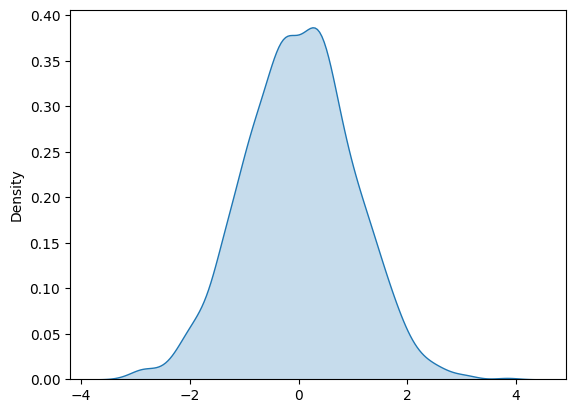

In [45]:
sns.kdeplot(y.ravel(), fill=True)

In [46]:
model = LinearRegression()
model.fit(X.reshape(-1,1), y.reshape(-1,1))
y_pred = model.predict(X.reshape(-1,1))


Text(0.5, 1.0, 'Linear Regression')

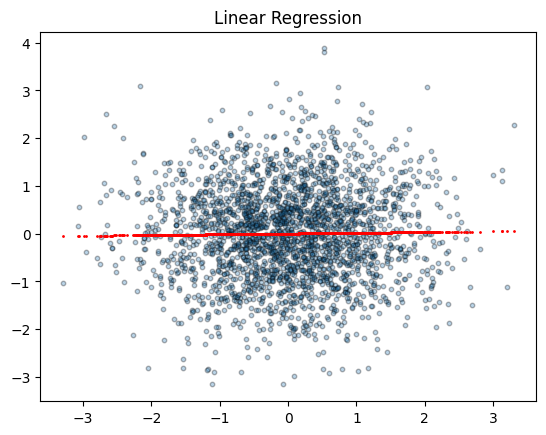

In [47]:
plt.scatter(X, y, alpha = 0.3, edgecolors='black', s=10)
plt.scatter(X,y_pred, s=1, color='red')
plt.title('Linear Regression')

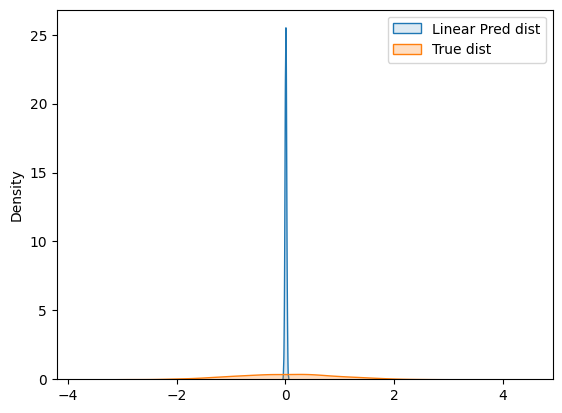

In [48]:
sns.kdeplot(y_pred.ravel(), fill=True, alpha = 0.15, label = 'Linear Pred dist')      
sns.kdeplot(y.ravel(), fill=True, label = 'True dist')
plt.legend()

In [49]:
model = KernelRidge(kernel = 'rbf')
model.fit(X, y)
y_pred = model.predict(X)

Text(0.5, 1.0, 'Non Linear Regression')

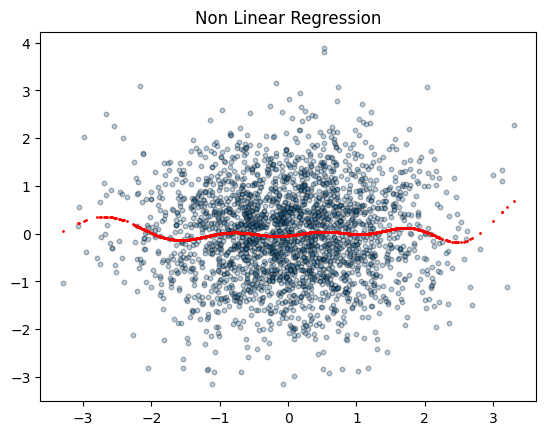

In [40]:
plt.scatter(X, y, alpha = 0.3, edgecolors='black', s=10)
plt.scatter(X,y_pred, s=1, color='red')
plt.title('Non Linear Regression')

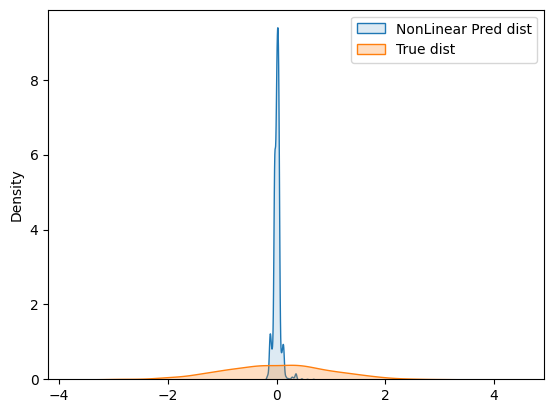

In [41]:
sns.kdeplot(y_pred.ravel(), fill=True, alpha = 0.15, label = 'NonLinear Pred dist')      
sns.kdeplot(y.ravel(), fill=True, label = 'True dist')
plt.legend()

In [52]:
EPOCHS = 1000
BATCH_SIZE=len(X)

model = MDN(n_mixtures = 1, 
            dist = 'laplace',
            input_neurons = 1000, 
            hidden_neurons = [25], 
            gmm_boost = False,
            optimizer = 'adam',
            learning_rate = 0.001, 
            early_stopping = 250,
            tf_mixture_family = True,
            input_activation = 'relu',
            hidden_activation = 'leaky_relu')

model.fit(X, y, epochs = EPOCHS, batch_size = BATCH_SIZE)

last 2
Epoch: 0 Loss: 1.496
Epoch: 1 Loss: 1.479
Epoch: 2 Loss: 1.470
Epoch: 6 Loss: 1.445
Epoch: 9 Loss: 1.443
Epoch: 30 Loss: 1.438
Epoch: 68 Loss: 1.429
Early stopping is trigger at step: 318 loss:1.4469357914767411


1... /1


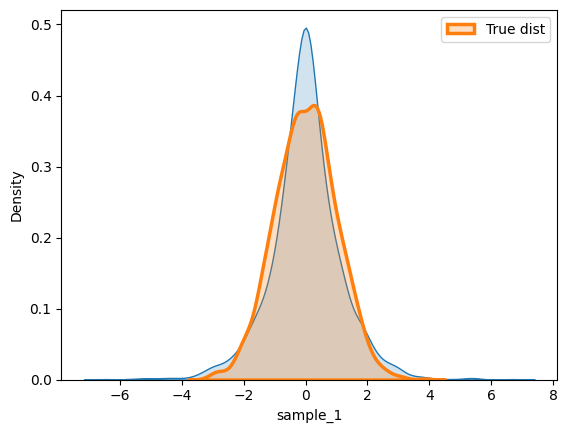

In [53]:
model.plot_distribution_fit(n_samples_batch=1)

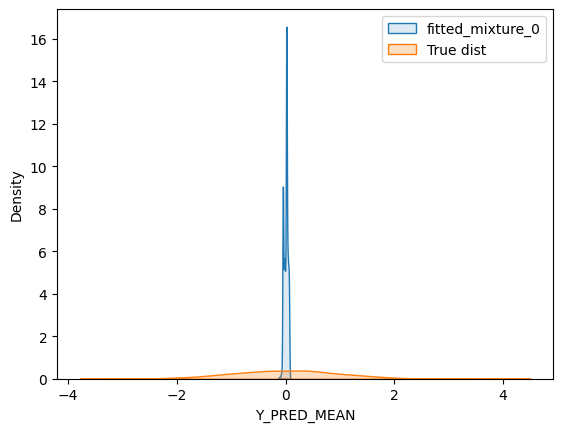

In [11]:
model.plot_all_distribution_fit(n_samples_batch=1)


1... /1


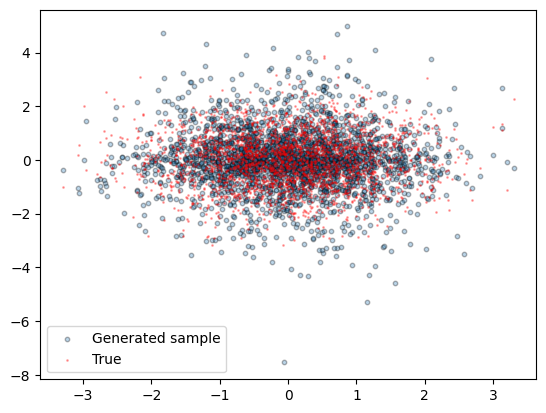

In [56]:
model.plot_samples_vs_true(X, y, alpha = 0.3)

### For 2 Clusters

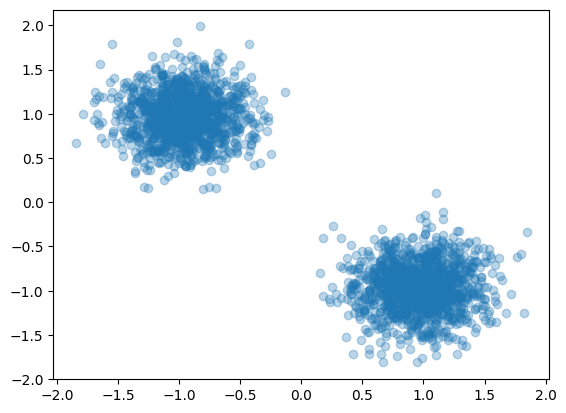

In [3]:
X1, y1 = make_blobs(n_samples=2500, centers=2, cluster_std=1.0, random_state=42)
y1 = X1[:, 1].reshape(-1,1)
X1 = X1[:, 0].reshape(-1,1)

x1_scaler = StandardScaler()
y1_scaler = StandardScaler()

X1 = x1_scaler.fit_transform(X1)
y1 = y1_scaler.fit_transform(y1)

plt.scatter(X1, y1, alpha = 0.3)
# Create a df with the data
import pandas as pd
df = pd.DataFrame(data = X1, columns = ['X'])
df['y'] = y1

<AxesSubplot:ylabel='Density'>

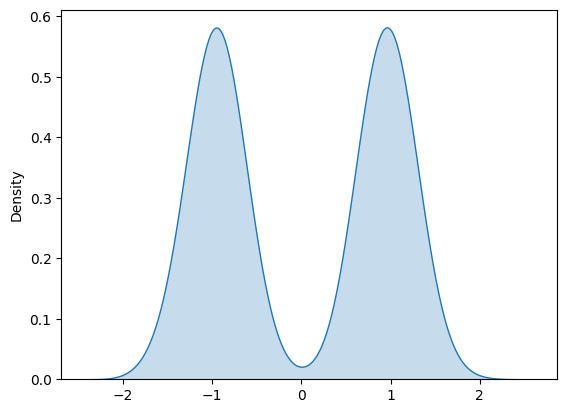

In [3]:
sns.kdeplot(y1.ravel(), fill=True)

Text(0.5, 1.0, 'Linear Regression')

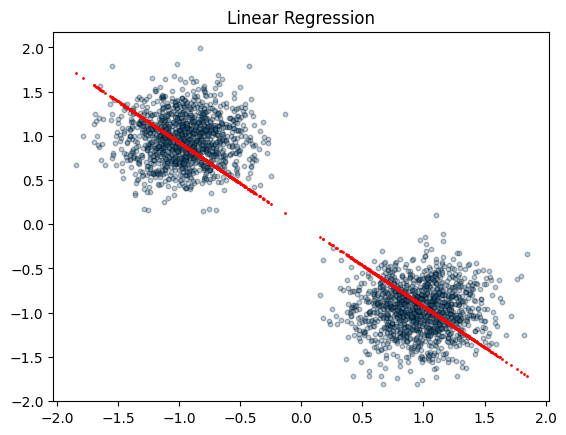

In [16]:
model1 = LinearRegression()
model1.fit(X1.reshape(-1,1), y1.reshape(-1,1))
y_pred1 = model1.predict(X1.reshape(-1,1))

plt.scatter(X1, y1, alpha = 0.3, edgecolors='black', s=10)
plt.scatter(X1,y_pred1, s=1, color='red')
plt.title('Linear Regression')

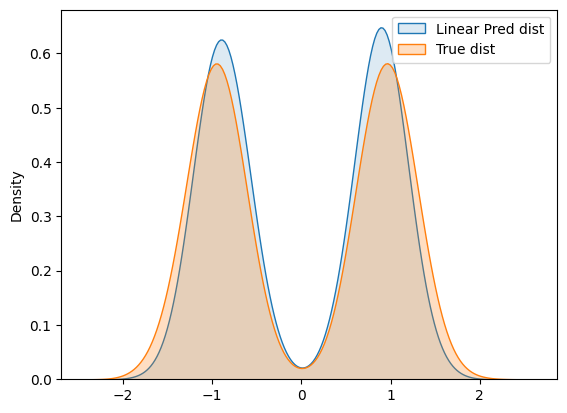

In [17]:
sns.kdeplot(y_pred1.ravel(), fill=True, alpha = 0.15, label = 'Linear Pred dist')      
sns.kdeplot(y1.ravel(), fill=True, label = 'True dist')
plt.legend()

Text(0.5, 1.0, 'Non Linear Regression')

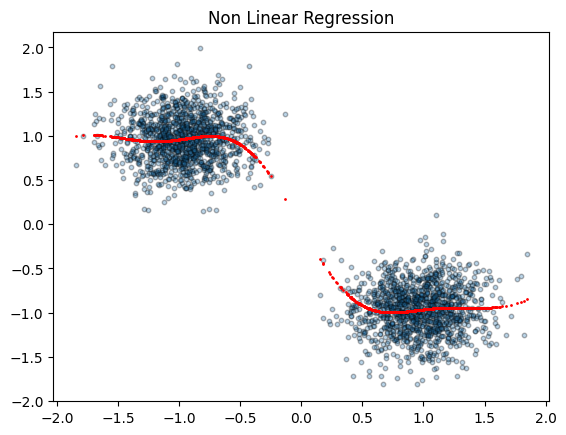

In [18]:
model1 = KernelRidge(kernel = 'rbf')
model1.fit(X1, y1)
y_pred1 = model1.predict(X1)

plt.scatter(X1, y1, alpha = 0.3, edgecolors='black', s=10)
plt.scatter(X1,y_pred1, s=1, color='red')
plt.title('Non Linear Regression')

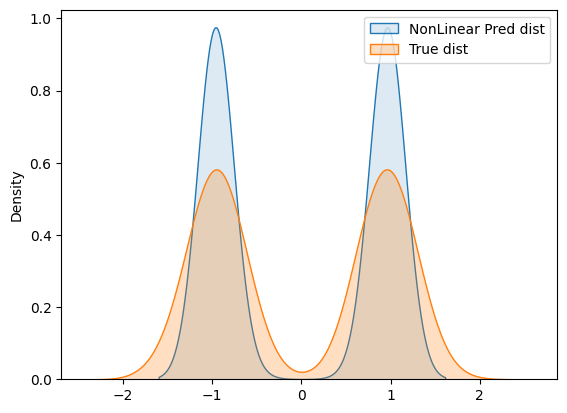

In [19]:
sns.kdeplot(y_pred1.ravel(), fill=True, alpha = 0.15, label = 'NonLinear Pred dist')      
sns.kdeplot(y1.ravel(), fill=True, label = 'True dist')
plt.legend()

In [12]:
EPOCHS = 1000
BATCH_SIZE=len(X1)

model1 = MDN(n_mixtures = 2, 
            dist = 'laplace',
            input_neurons = 1000, 
            hidden_neurons = [25], 
            gmm_boost = False,
            optimizer = 'adam',
            learning_rate = 0.001, 
            early_stopping = 250,
            tf_mixture_family = True,
            input_activation = 'relu',
            hidden_activation = 'leaky_relu')

model1.fit(X1, y1, epochs = EPOCHS, batch_size = BATCH_SIZE)

last 2
Epoch: 0 Loss: 1.649
Epoch: 1 Loss: 1.623
Epoch: 2 Loss: 1.587
Epoch: 3 Loss: 1.549
Epoch: 4 Loss: 1.504
Epoch: 5 Loss: 1.464
Epoch: 6 Loss: 1.403
Epoch: 7 Loss: 1.355
Epoch: 8 Loss: 1.297
Epoch: 9 Loss: 1.237
Epoch: 10 Loss: 1.175
Epoch: 11 Loss: 1.120
Epoch: 12 Loss: 1.057
Epoch: 13 Loss: 1.002
Epoch: 14 Loss: 0.964
Epoch: 15 Loss: 0.910
Epoch: 16 Loss: 0.851
Epoch: 17 Loss: 0.794
Epoch: 18 Loss: 0.742
Epoch: 19 Loss: 0.683
Epoch: 20 Loss: 0.628
Epoch: 21 Loss: 0.597
Epoch: 22 Loss: 0.553
Epoch: 23 Loss: 0.542
Epoch: 24 Loss: 0.504
Epoch: 26 Loss: 0.485
Epoch: 27 Loss: 0.460
Epoch: 28 Loss: 0.451
Epoch: 30 Loss: 0.427
Epoch: 31 Loss: 0.418
Epoch: 32 Loss: 0.406
Epoch: 33 Loss: 0.387
Epoch: 34 Loss: 0.375
Epoch: 35 Loss: 0.368
Epoch: 40 Loss: 0.317
Epoch: 45 Loss: 0.316
Epoch: 46 Loss: 0.304
Epoch: 48 Loss: 0.294
Epoch: 49 Loss: 0.292
Epoch: 51 Loss: 0.291
Epoch: 52 Loss: 0.274
Epoch: 55 Loss: 0.257
Epoch: 58 Loss: 0.257
Epoch: 59 Loss: 0.251
Epoch: 62 Loss: 0.235
Epoch: 67 Los

1... /1


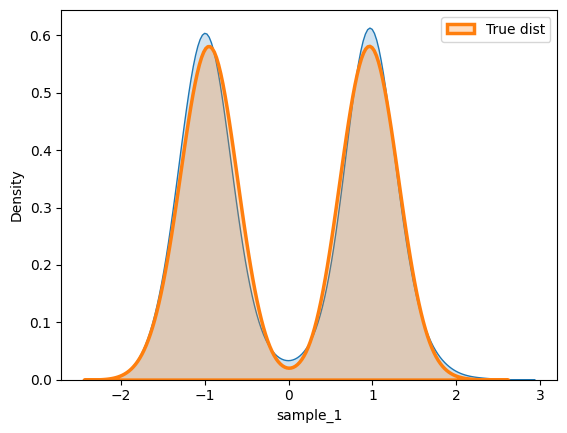

In [13]:
model1.plot_distribution_fit(n_samples_batch=1)

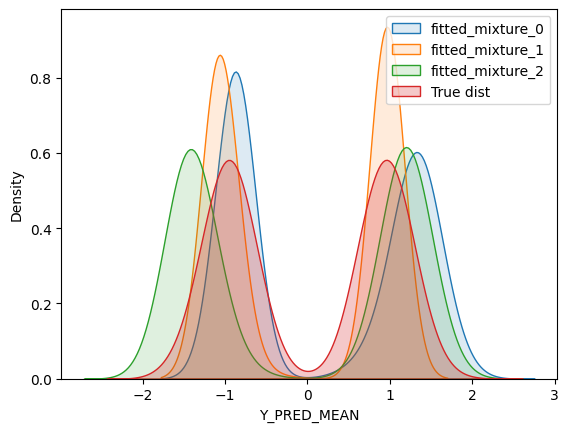

In [14]:
model1.plot_all_distribution_fit(n_samples_batch=1)

1... /1


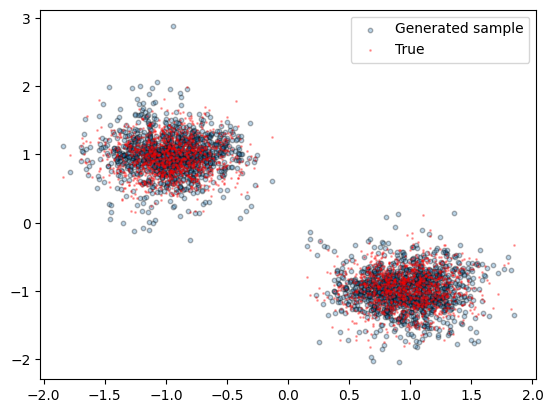

In [15]:
model1.plot_samples_vs_true(X1, y1, alpha = 0.3)

In [21]:
EPOCHS = 1000
BATCH_SIZE=len(X1)

for i in range(1, 11):
        print('n_mixtures = {}'.format(i))
        model = MDN(n_mixtures = i, 
            dist = 'laplace',
            input_neurons = 1000, 
            hidden_neurons = [25], 
            gmm_boost = False,
            optimizer = 'adam',
            learning_rate = 0.001, 
            early_stopping = 250,
            tf_mixture_family = True,
            input_activation = 'relu',
            hidden_activation = 'leaky_relu')
        
        model.fit(X1, y1, epochs = EPOCHS, batch_size = BATCH_SIZE)

        plt1 = model.plot_distribution_fit(n_samples_batch=1)
        plt.title('n_mixtures = {}'.format(i))
        plt.savefig('images/cumilative/n_mixtures_{}.png'.format(i))
        plt.close()
    
        plt3 = model.plot_all_distribution_fit(n_samples_batch=1)
        plt.title('n_mixtures = {}'.format(i))
        plt.savefig('images/separated/n_mixtures_{}.png'.format(i))
        plt.close()

        plt2 = model.plot_samples_vs_true(X1, y1, alpha = 0.3)
        plt.title('n_mixtures = {}'.format(i))
        plt.savefig('images/blob/n_mixtures_{}.png'.format(i))
        plt.close()

n_mixtures = 1
last 2
Epoch: 0 Loss: 1.639
Epoch: 1 Loss: 1.565
Epoch: 2 Loss: 1.497
Epoch: 3 Loss: 1.399
Epoch: 4 Loss: 1.321
Epoch: 5 Loss: 1.220
Epoch: 6 Loss: 1.140
Epoch: 7 Loss: 1.040
Epoch: 8 Loss: 0.951
Epoch: 9 Loss: 0.881
Epoch: 10 Loss: 0.829
Epoch: 11 Loss: 0.780
Epoch: 12 Loss: 0.750
Epoch: 14 Loss: 0.737
Epoch: 15 Loss: 0.722
Epoch: 16 Loss: 0.679
Epoch: 17 Loss: 0.666
Epoch: 18 Loss: 0.614
Epoch: 19 Loss: 0.565
Epoch: 20 Loss: 0.550
Epoch: 21 Loss: 0.516
Epoch: 22 Loss: 0.500
Epoch: 23 Loss: 0.482
Epoch: 24 Loss: 0.457
Epoch: 25 Loss: 0.448
Epoch: 26 Loss: 0.440
Epoch: 27 Loss: 0.407
Epoch: 30 Loss: 0.402
Epoch: 31 Loss: 0.375
Epoch: 33 Loss: 0.361
Epoch: 38 Loss: 0.341
Epoch: 45 Loss: 0.328
Epoch: 47 Loss: 0.324
Epoch: 48 Loss: 0.321
Epoch: 50 Loss: 0.312
Epoch: 52 Loss: 0.311
Epoch: 53 Loss: 0.307
Epoch: 56 Loss: 0.288
Epoch: 61 Loss: 0.268
Epoch: 64 Loss: 0.255
Epoch: 66 Loss: 0.254
Epoch: 70 Loss: 0.240
Epoch: 73 Loss: 0.234
Epoch: 76 Loss: 0.225
Epoch: 78 Loss: 0.22